# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(50)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 50

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.2, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [6]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [7]:
ip_reservoir.pre_train(X_TR, eta=0.00005, epochs=15,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2421.715576171875.
- Epoch: 2) | KL Divergence value: 2251.626708984375.
- Epoch: 3) | KL Divergence value: 2100.927490234375.
- Epoch: 4) | KL Divergence value: 1983.90625.
- Epoch: 5) | KL Divergence value: 1901.8070068359375.
- Epoch: 6) | KL Divergence value: 1846.5374755859375.
- Epoch: 7) | KL Divergence value: 1810.8759765625.
- Epoch: 8) | KL Divergence value: 1788.4510498046875.
- Epoch: 9) | KL Divergence value: 1773.453125.
- Epoch: 10) | KL Divergence value: 1762.1295166015625.
- Epoch: 11) | KL Divergence value: 1752.91552734375.
- Epoch: 12) | KL Divergence value: 1745.7093505859375.
- Epoch: 13) | KL Divergence value: 1740.917236328125.
- Epoch: 14) | KL Divergence value: 1738.9136962890625.
- Epoch: 15) | KL Divergence value: 1740.1480712890625.


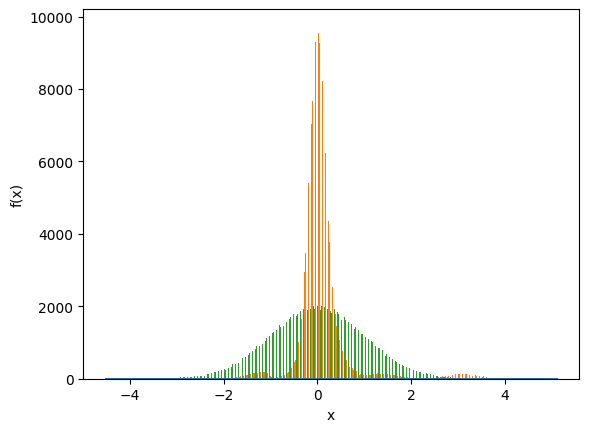

In [8]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [9]:
ip_reservoir.max_eigs()

tensor(0.8420)

In [10]:
ip_reservoir.rescale_weights(0.96)
ip_reservoir.max_eigs()

tensor(0.9600)

In [11]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.026595598086714745)  ACTUAL_STD == (0.09974408149719238)][ TARGET_MEAN == (0.00889020599424839) TARGET_STD == (0.9974004626274109)]
Unit - (2): [ ACTUAL_MEAN == (-0.03656061738729477)  ACTUAL_STD == (0.1745930016040802)][ TARGET_MEAN == (-0.008060931228101254) TARGET_STD == (0.9887678027153015)]
Overall network: [ACTUAL_MEAN == (0.09409499168395996)  ACTUAL_STD == (0.5639753341674805)]


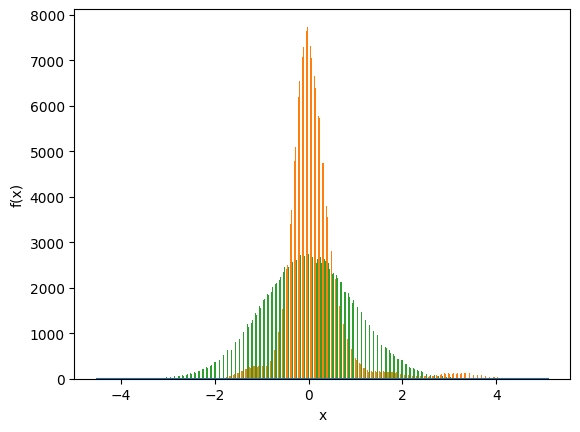

In [12]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

## BIMODAL MIXTURE OF GAUSSIAN

In [13]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [14]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=15,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3391.117431640625.
- Epoch: 2) | KL Divergence value: 3127.937255859375.
- Epoch: 3) | KL Divergence value: 2887.721435546875.
- Epoch: 4) | KL Divergence value: 2671.99365234375.
- Epoch: 5) | KL Divergence value: 2481.146484375.
- Epoch: 6) | KL Divergence value: 2314.62646484375.
- Epoch: 7) | KL Divergence value: 2171.162109375.
- Epoch: 8) | KL Divergence value: 2049.015380859375.
- Epoch: 9) | KL Divergence value: 1946.16064453125.
- Epoch: 10) | KL Divergence value: 1860.47705078125.
- Epoch: 11) | KL Divergence value: 1789.88330078125.
- Epoch: 12) | KL Divergence value: 1732.447265625.
- Epoch: 13) | KL Divergence value: 1686.407470703125.
- Epoch: 14) | KL Divergence value: 1650.260009765625.
- Epoch: 15) | KL Divergence value: 1622.769775390625.


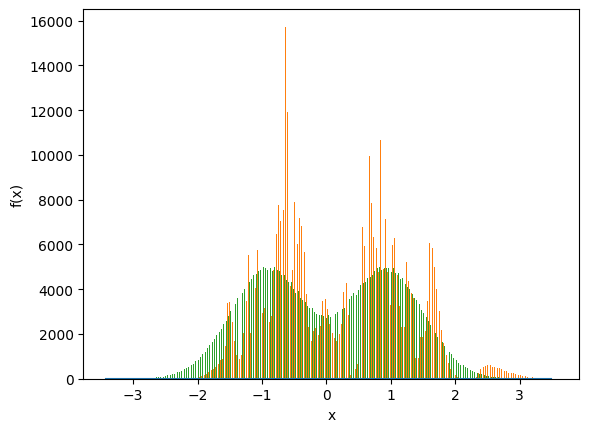

In [15]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [16]:
bimodal_reservoir.max_eigs()

tensor(0.4077)

In [17]:
ip_reservoir.rescale_weights(0.96)
ip_reservoir.max_eigs()

tensor(0.9600)

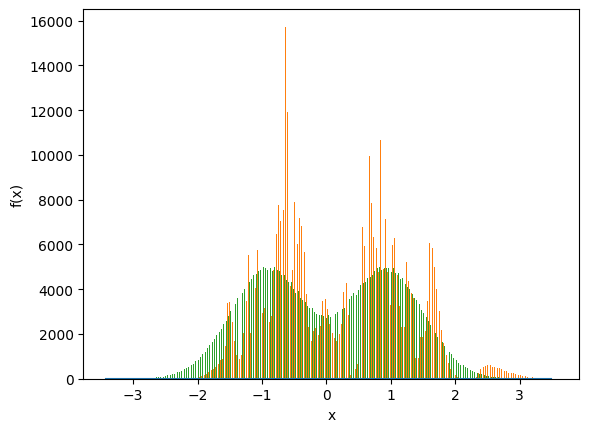

In [18]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [19]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.6051836013793945)  ACTUAL_STD == (0.008368948474526405)][ TARGET_MEAN == (-0.9183151125907898) TARGET_STD == (0.5839623212814331)]
Unit - (2): [ ACTUAL_MEAN == (0.23329654335975647)  ACTUAL_STD == (0.05243826285004616)][ TARGET_MEAN == (0.9143847227096558) TARGET_STD == (0.5737320780754089)]
Overall network: [ACTUAL_MEAN == (0.18827302753925323)  ACTUAL_STD == (1.0058536529541016)]


## EVAUALTUION IN ESN

In [20]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.reservoir.reset_initial_state()
ip_esn.reservoir.reset_initial_state()
bimodal_esn.reservoir.reset_initial_state()

simple_esn.reservoir.warm_up(X_TR[0:100])
ip_esn.reservoir.warm_up(X_TR[0:100])
bimodal_esn.reservoir.warm_up(X_TR[0:100])

simple_esn.train(X_TR[100:None], Y_TR[100:None], 0)
ip_esn.train(X_TR[100:None], Y_TR[100:None], 0)
bimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)


Reservoir warmed up with the first 100 time steps


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.2658844 , 0.23831177, 0.24507904, ..., 0.27938843, 0.25286102,
       0.24232483], dtype=float32)

### COMPARISON ON TEST DATA

In [21]:
from Metrics import NRMSE, MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02138453903900278


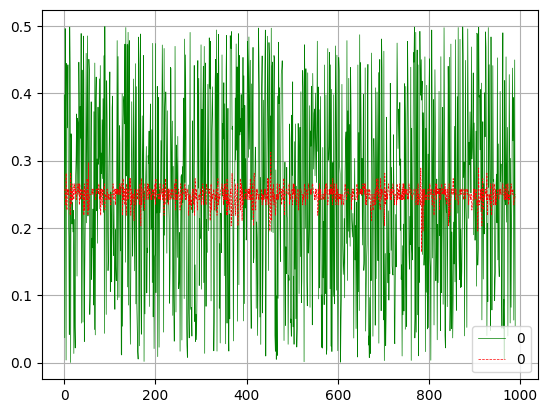

In [22]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.021101993356104916


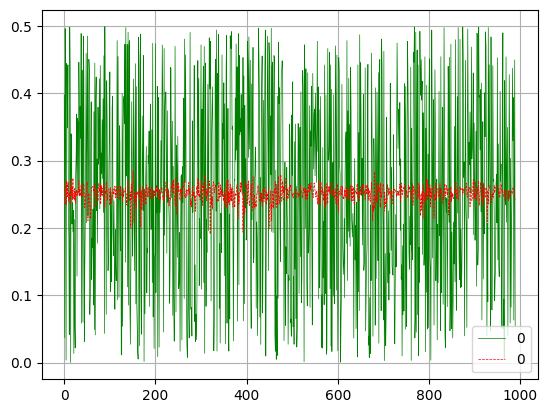

In [23]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02121139304501713


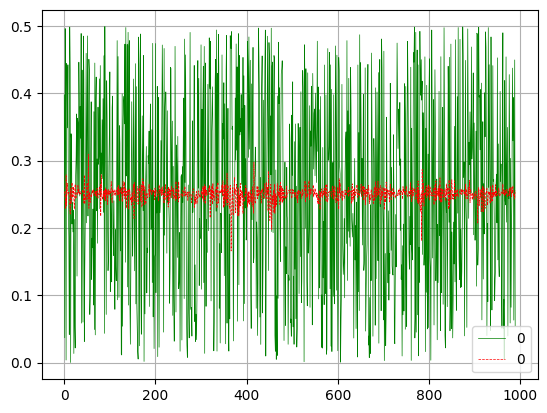

In [24]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## LYAPUNOV EXPONENTS

In [26]:
simple_esn.reservoir.LCE(X_TS)

-2.0933855

In [27]:
ip_esn.reservoir.LCE(X_TS)

-0.08433385

In [28]:
bimodal_esn.reservoir.LCE(X_TS)

-1.2428882

## MEMORY CAPACITY

In [29]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [30]:
mean_mc(simple_esn, 5)

tensor(5.8486)

In [31]:
mean_mc(ip_esn, 5)

tensor(14.9331)

In [32]:
mean_mc(bimodal_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.89824e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.21495e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.12483e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(8.7324)

## DEVIATION FROM LINEARITY

In [33]:
simple_esn.reservoir.de_fi()

0.23033420319009487


In [34]:
ip_esn.reservoir.de_fi()

0.3371121569968093


In [35]:
bimodal_esn.reservoir.de_fi()

0.2524319230923453
